In [1]:
import os

In [2]:
os.chdir("F:\\PROGRAMMING\\Python")

In [3]:
pwd

'F:\\PROGRAMMING\\Python'

In [7]:
import pandas as pd 
import numpy as np
wcat=pd.read_csv("wc.at.csv")

In [8]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


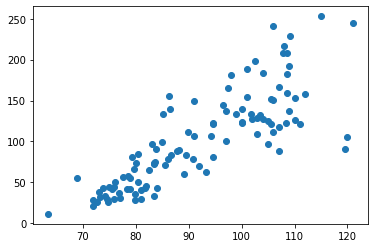

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x=wcat['Waist'],y=wcat['AT'])

In [11]:
np.corrcoef(x=wcat['Waist'],y=wcat['AT'])

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [12]:
import statsmodels.formula.api as smf
model=smf.ols('AT~Waist',data=wcat).fit()

In [13]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.62e-27
Time:                        12:13:52   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print(model.conf_int(0.05))

                    0           1
Intercept -259.190053 -172.772923
Waist        2.993689    3.924030


In [23]:
pred = model.predict(pd.DataFrame(wcat['Waist']))
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
5       32.537559
6       63.840237
7       72.487385
8        3.656083
9       37.207020
10      32.710502
11      43.432966
12      36.861134
13      57.268404
14      50.350685
15      22.160981
16      46.718883
17      40.492936
18      39.282335
19      46.545940
20      49.831856
21      63.840237
22      60.381377
23      92.548770
24      67.644982
25     102.233576
26      83.555735
27      62.456693
28      81.480420
29      69.374412
          ...    
79     161.034186
80     142.010459
81     164.493045
82     164.493045
83     171.410764
84     159.304756
85     143.739889
86     167.951905
87     159.304756
88     202.540498
89     161.034186
90     121.257303
91     148.928178
92     122.986732
93     110.880725
94     119.527873
95     147.198748
96     150.657608
97     126.445592
98      98.774717
99     138.551600
100    150.657608
101    161.380072
102    181.787342
103    133

In [24]:
model2 = smf.ols('AT~np.log(Waist)',data=wcat).fit()
model2.params
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           6.80e-28
Time:                        12:21:38   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))
pred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
5       27.279545
6       64.902356
7       74.554213
8      -11.899606
9       33.182963
10      27.500161
11      40.887040
12      32.749422
13      57.365321
14      49.233194
15      13.753591
16      44.878862
17      37.272314
18      35.771839
19      44.670014
20      48.614795
21      64.902356
22      60.957833
23      95.876103
24      69.185406
25     105.677983
26      86.494845
27      63.330429
28      84.289954
29      71.113288
          ...    
79     159.451269
80     143.031172
81     162.347504
82     162.347504
83     168.061813
84     157.993171
85     144.559539
86     165.217529
87     157.993171
88     192.573752
89     159.451269
90     124.092079
91     149.100938
92     125.714259
93     114.180786
94     122.461558
95     147.594352
96     150.600399
97     128.933937
98     102.211986
99     139.952162
100    150.600399
101    159.742085
102    176.444739
103    135